In [105]:
import importlib
import matplotlib.pyplot as plt

from pos_tagging.tag_datasets import TagData
from pos_tagging.models import PosTagger

importlib.reload(TagData)
importlib.reload(PosTagger)

TagDataset = TagData.TagDataset

In [106]:
trainData = TagDataset('./data/UD_English-Atis/en_atis-ud-train.conllu')
print(len(trainData.vocabulary))
print(len(trainData.classes))

devData = TagDataset('./data/UD_English-Atis/en_atis-ud-dev.conllu')

865
13


In [107]:
posTagger = PosTagger.AnnPosTagger(trainData, 
                                   devData, 
                                   contextSize=2, 
                                   activation='relu', 
                                   embeddingSize=128,
                                   hiddenLayers=[32])
posTagger.train(epochs=300, learningRate=0.001)

torch.Size([48655, 5]) torch.Size([48655, 13])
torch.Size([6642, 5]) torch.Size([6642, 14])


RuntimeError: 0D or 1D target tensor expected, multi-target not supported

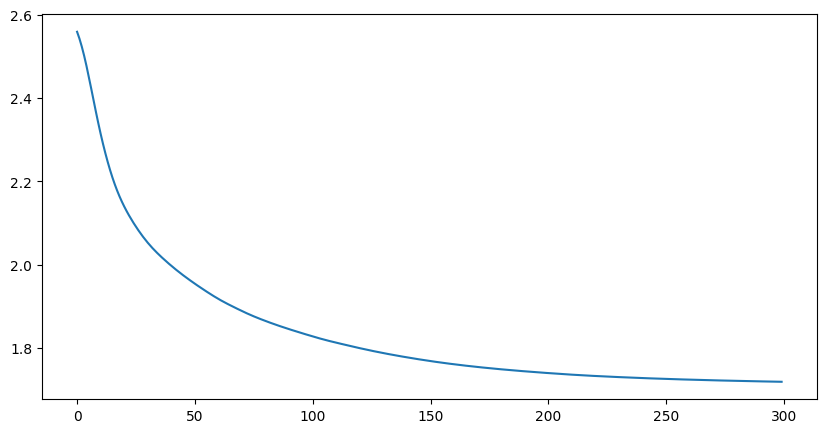

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(posTagger.trainLoss)
plt.plot(posTagger.devLoss)
plt.show()

In [ ]:
testData = TagDataset('./data/UD_English-Atis/en_atis-ud-test.conllu')
i = 0

sentence = [ word[1] for word in testData.dataset[i] ]
preds = posTagger.predict(sentence)
print(sentence)
print(preds)
print([word[2] for word in testData.dataset[i]])

['what', 'are', 'the', 'coach', 'flights', 'between', 'dallas', 'and', 'baltimore', 'leaving', 'august', 'tenth', 'and', 'returning', 'august', 'twelve']
['PRON', 'AUX', 'DET', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'CCONJ', 'PROPN', 'VERB', 'NOUN', 'ADJ', 'CCONJ', 'VERB', 'NOUN', 'PROPN']
['PRON', 'AUX', 'DET', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'CCONJ', 'PROPN', 'VERB', 'NOUN', 'ADJ', 'CCONJ', 'VERB', 'NOUN', 'NUM']


In [ ]:
posTagger.evaluateModel(testData)

              precision    recall  f1-score   support

         ADJ       0.91      0.95      0.93       220
         ADP       0.99      1.00      0.99      1434
         ADV       0.98      0.61      0.75        76
         AUX       0.98      0.97      0.97       256
       CCONJ       1.00      0.98      0.99       109
         DET       0.99      0.98      0.99       512
        INTJ       1.00      1.00      1.00        36
        NOUN       0.98      0.98      0.98      1166
         NUM       0.96      0.81      0.88       127
        PART       0.95      0.98      0.96        56
        PRON       1.00      0.98      0.99       392
       PROPN       0.97      0.99      0.98      1567
        VERB       0.98      0.97      0.98       629

    accuracy                           0.98      6580
   macro avg       0.98      0.94      0.95      6580
weighted avg       0.98      0.98      0.98      6580



{'accuracy': 0.9775075987841946,
 'precision': 0.9776295935004419,
 'recall': 0.9775075987841946,
 'f1': 0.9768696907805227}